## Project Description

This project is a regression project that aims to predict the IQ of a baby based on a set of input features from their mother. The stages involved in this project are as follows:

1. Data Exploration: In this stage, we analyze the dataset to gain insights into its structure, identify potential relationships between variables, and understand the distribution of the target variable.

2. Data Cleaning: In this stage, we handle missing values, outliers, and any inconsistencies in the dataset. This involves techniques such as imputation, removal of outliers, and data normalization.

3. Data Analysis: In this stage, we perform exploratory data analysis (EDA) to further understand the relationships between variables, identify patterns, and detect any potential issues that may affect the regression model.

4. Model Development: In this stage, we develop a regression model using appropriate algorithms such as linear regression, decision trees, or ensemble methods. We train the model on the cleaned dataset and tune its hyperparameters to optimize its performance.

5. Model Testing: In this stage, we evaluate the performance of the regression model using appropriate evaluation metrics such as mean squared error (MSE), root mean squared error (RMSE), or R-squared. We assess the model's ability to generalize to unseen data and make predictions on new instances.

Throughout these stages, we may iterate and refine our approach based on the insights gained and the performance of the model. The ultimate goal is to build an accurate regression model that can effectively predict the target variable based on the given input features.


In [69]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, ShuffleSplit
import xgboost as xgb
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import plotly.express as px
import scipy.stats as stats
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

#from dataprep.eda import create_report

# 1. Data exploration

In [2]:
sys.path.append('../DATA/iq_data')
data_child = pd.read_csv('../DATA/iq_data/child_iq.csv')
data_kid = pd.read_csv('../DATA/iq_data/kid_iq.csv')

In [3]:
print('Data child data frame:')
display(data_child)
print('Data kid data frame:')
display(data_kid)

Data child data frame:


,Unnamed: 0,ppvt,educ_cat,momage
0,1,120,2,21
1,2,89,1,17
2,3,78,2,19
3,4,42,1,20
4,5,115,4,26
...,...,...,...,...
395,396,87,3,21
396,397,69,2,20
397,398,80,1,25
398,399,98,1,18


Data kid data frame:


,Unnamed: 0,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,1,65,1,121.117529,4,27
1,2,98,1,89.361882,4,25
2,3,85,1,115.443165,4,27
3,4,83,1,99.449639,3,25
4,5,115,1,92.745710,4,27
...,...,...,...,...,...,...
429,430,94,0,84.877412,4,21
430,431,76,1,92.990392,4,23
431,432,50,0,94.859708,2,24
432,433,88,1,96.856624,2,21


data_child -> provides information like the child' test score at age 3 (ppvt), the mother's age at childbirth (momage), and the mother's education level (educ_cat, where 1 stands for no HS education, 2 = HS grad, 3 = some college, and 4 = college grad).

data_kid -> provides information on the kid's score (kid_score), if the mother went to high school or not (mom_hs), on the mother's IQ (mom_iq), on her job (mom_work), and finally on her age (mom_age)

# EDA

## Child dataset

In [4]:
display(data_child.head())
display(data_child.info())
display(data_child.describe())

,Unnamed: 0,ppvt,educ_cat,momage
0,1,120,2,21
1,2,89,1,17
2,3,78,2,19
3,4,42,1,20
4,5,115,4,26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  400 non-null    int64
 1   ppvt        400 non-null    int64
 2   educ_cat    400 non-null    int64
 3   momage      400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


None

,Unnamed: 0,ppvt,educ_cat,momage
count,400.000000,400.000000,400.000000,400.000000
mean,200.500000,86.932500,2.112500,22.790000
std,115.614301,20.440094,0.813325,2.689607
min,1.000000,20.000000,1.000000,17.000000
25%,100.750000,74.000000,2.000000,21.000000
50%,200.500000,90.000000,2.000000,23.000000
75%,300.250000,102.000000,3.000000,25.000000
max,400.000000,144.000000,4.000000,29.000000


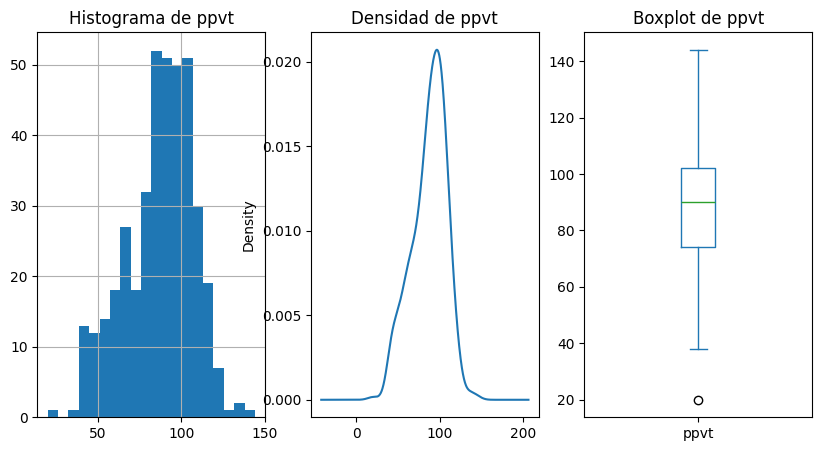

In [5]:
# Distribucion de ppvt: score at age 3
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

data_child['ppvt'].hist(ax=ax1, bins=20, xlabelsize=10, ylabelsize=10)
ax1.set_title('Histograma de ppvt')

data_child['ppvt'].plot(kind='kde', ax=ax2)
ax2.set_title('Densidad de ppvt')

data_child['ppvt'].plot(kind='box', ax=ax3)
ax3.set_title('Boxplot de ppvt')

plt.show()

educ_cat
2    212
1     85
3     76
4     27
Name: count, dtype: int64

Correlation between educ_cat and ppvt: 0.203227320218482


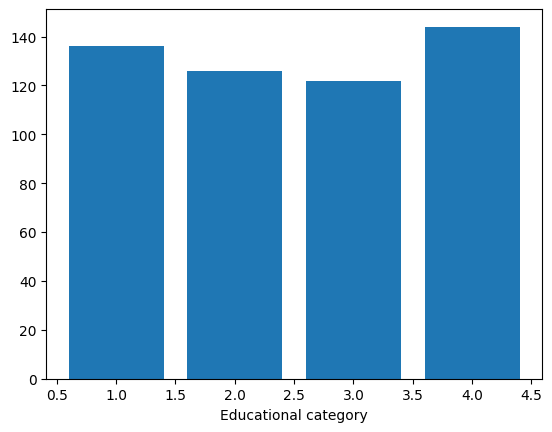

In [6]:
# educ_cat: education of the mother (categorical)
display(data_child['educ_cat'].value_counts())

correlation = data_child['educ_cat'].corr(data_child['ppvt'])
print("Correlation between educ_cat and ppvt:", correlation)



fig, ax = plt.subplots()
plt.bar(data_child['educ_cat'], data_child['ppvt'])
plt.xlabel('Educational category')

plt.show()

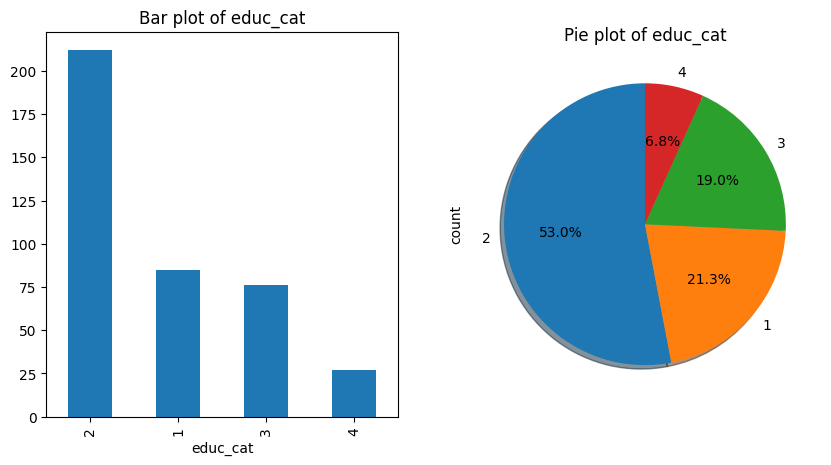

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

educ_cat_counts = data_child['educ_cat'].value_counts().head(4)
educ_cat_counts.plot(kind='bar', ax=ax1)

educ_cat_counts.plot(kind='pie',ax= ax2, autopct='%1.1f%%', startangle=90, shadow=True)

ax1.set_title('Bar plot of educ_cat')
ax2.set_title('Pie plot of educ_cat')
plt.show()

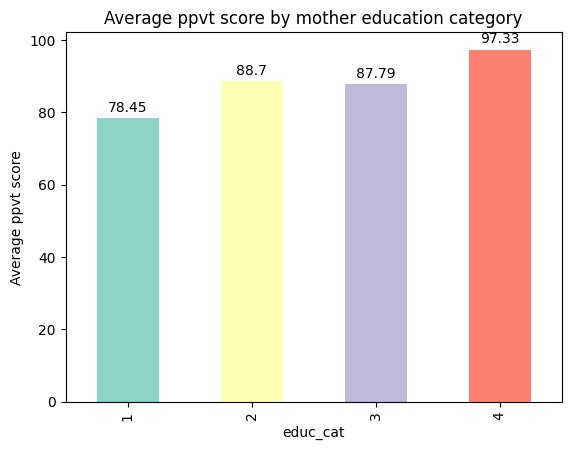

We can see thet the average ppvt score increases with the education of the mother


In [8]:
avg_score_by_mom_ed = data_child.groupby('educ_cat')['ppvt'].mean()

# Define a color palette
colors = sns.color_palette('Set3')

# Plot the bar chart with different colors for each bar
ax = avg_score_by_mom_ed.plot(kind='bar', color=colors)

# Add the score of ppvt over every bar
for i, v in enumerate(avg_score_by_mom_ed):
    ax.text(i, v + 1, str(round(v, 2)), ha='center', va='bottom')

# Display the plot
plt.title('Average ppvt score by mother education category')
plt.ylabel('Average ppvt score')
plt.show()

print('We can see thet the average ppvt score increases with the education of the mother')

## kid Dataset

In [9]:
display(data_kid.head())
display(data_kid.info())
display(data_kid.describe())

,Unnamed: 0,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,1,65,1,121.117529,4,27
1,2,98,1,89.361882,4,25
2,3,85,1,115.443165,4,27
3,4,83,1,99.449639,3,25
4,5,115,1,92.745710,4,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  434 non-null    int64  
 1   kid_score   434 non-null    int64  
 2   mom_hs      434 non-null    int64  
 3   mom_iq      434 non-null    float64
 4   mom_work    434 non-null    int64  
 5   mom_age     434 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 20.5 KB


None

,Unnamed: 0,kid_score,mom_hs,mom_iq,mom_work,mom_age
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000
mean,217.500000,86.797235,0.785714,100.000000,2.896313,22.785714
std,125.429263,20.410688,0.410799,15.000000,1.181394,2.701070
min,1.000000,20.000000,0.000000,71.037405,1.000000,17.000000
25%,109.250000,74.000000,1.000000,88.660321,2.000000,21.000000
50%,217.500000,90.000000,1.000000,97.915254,3.000000,23.000000
75%,325.750000,102.000000,1.000000,110.272742,4.000000,25.000000
max,434.000000,144.000000,1.000000,138.893106,4.000000,29.000000


In [10]:
# Vemos si hay una relacion entre el trabajo de la madre y el resultado del test

correlation = data_kid['mom_work'].corr(data_kid['kid_score'])

print('La correlacion entre el trabajo de la madre y la puntuacion del test es: {}'.format(correlation))

#Vemos si hay correlacion entre el score de la madre y el del hijo
correlation = data_kid['mom_iq'].corr(data_kid['kid_score'])

print('La correlacion entre el score de la madre y el del hijo es: {}'.format(correlation))


#Vemos si hay correlacion entre el score de la madre y si fue a la secundaria o no

correlation = data_kid['mom_iq'].corr(data_kid['mom_hs'])
print('La correlacion entre el score de la madre y si fue a la secundaria o no es: {}'.format(correlation))

La correlacion entre el trabajo de la madre y la puntuacion del test es: 0.08752798230312295
La correlacion entre el score de la madre y el del hijo es: 0.4482758422651739
La correlacion entre el score de la madre y si fue a la secundaria o no es: 0.2827093595793202


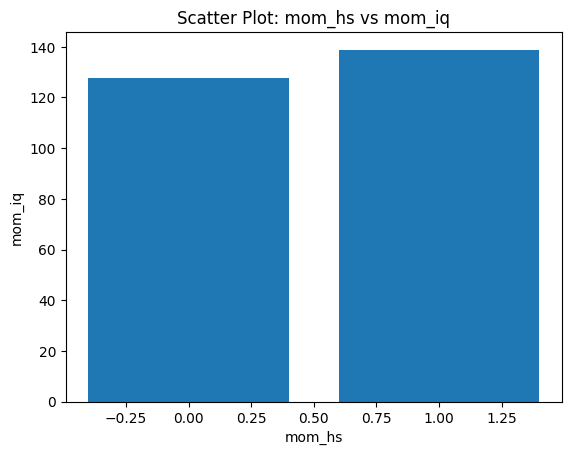

In [11]:
plt.bar(data_kid['mom_hs'], data_kid['mom_iq'])
plt.xlabel('mom_hs')
plt.ylabel('mom_iq')
plt.title('Scatter Plot: mom_hs vs mom_iq')
plt.show()

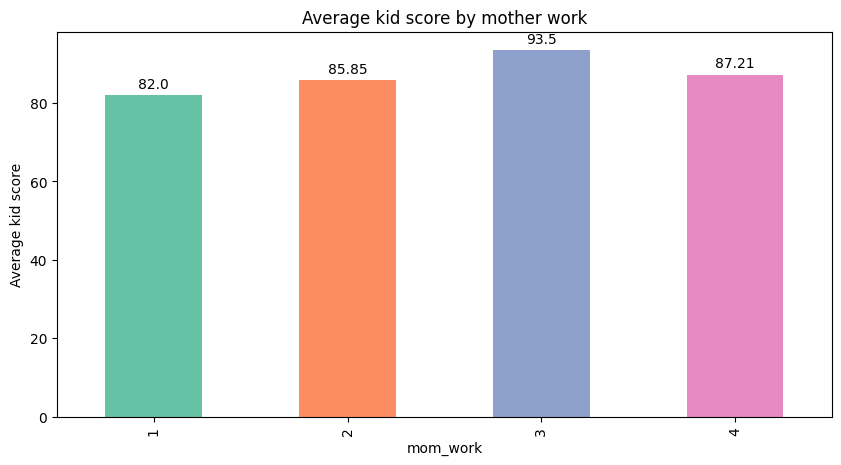

In [12]:
result_per_work = data_kid.groupby('mom_work')['kid_score'].mean()

fig, ax = plt.subplots(figsize=(10, 5))

result_per_work.plot(kind='bar', color=sns.color_palette('Set2'))

for i, v in enumerate(result_per_work):
    ax.text(i, v + 1, str(round(v, 2)), ha='center', va='bottom')

plt.title('Average kid score by mother work')
plt.ylabel('Average kid score')
plt.show()

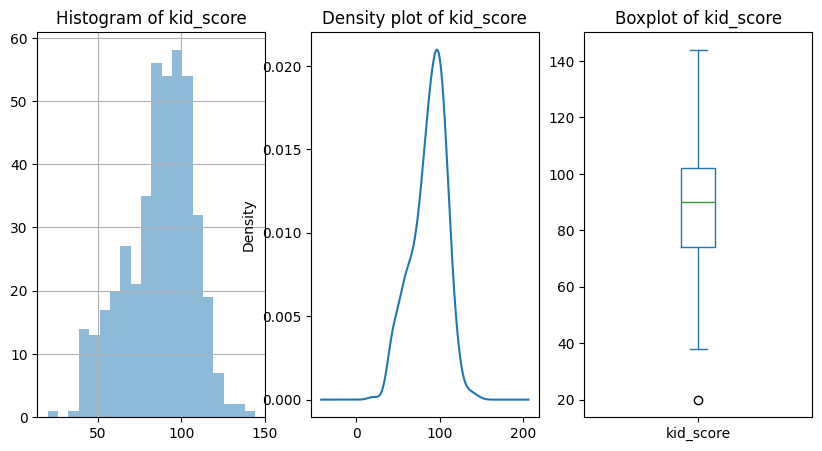

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

data_kid['kid_score'].hist(bins=20, alpha=0.5, ax=ax1)
data_kid['kid_score'].plot(kind='kde', ax=ax2)
data_kid['kid_score'].plot(kind='box', ax=ax3)

ax1.set_title('Histogram of kid_score')
ax2.set_title('Density plot of kid_score')
ax3.set_title('Boxplot of kid_score')
plt.show()

# Modeling

## Data split

In [14]:
target = data_kid['kid_score']
features = data_kid.drop(columns=['kid_score'])

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=42)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (390, 5)
X_test shape: (44, 5)


# Important: Due to the impediment of mergin both dataset, I will perform training only on the kid dataset

## Feature scaling:
In a regression problem we wan to scale al the values to ensure that the model captures the relative relations between variables and that one does not weight more than the other on algorithms suchs as linear regressions.

In [15]:
minmax_scaler = MinMaxScaler()
X_train = minmax_scaler.fit_transform(X_train)
X_test = minmax_scaler.transform(X_test)


# Model training and hyperparameter tuning

Several models will be trained and optimized over their hyperparameters.

I will evaluate the models performance on several most used metrics for regression problems. Among them: MSE, RMSE, R2 and MAE

The model that achieves the best performance will be used to predict on X_test. I will perform a grid search with cross validation folds to retrieve the best hyperparameters and to help the model to generalize better.

In [16]:
maes = []
r2 = []
model_instances = []

models = {"Linear Regression":0,
         "Polinomial Regression": 0,
          "XGBoost": 0,
          "Random Forest": 0,
          "MLP": 0,
         }

## 1. Lineal regression

In [17]:
model = LinearRegression()

linear_grid_search = GridSearchCV(
    model,
    param_grid={},
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

linear_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1, param_grid={},
             scoring='neg_mean_squared_error')

In [18]:
best_linear = linear_grid_search.best_estimator_
model_instances.append(best_linear)

In [19]:
y_pred_train = best_linear.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f"Mean Squared Error on the training set: {mse_train}")

Mean Squared Error on the training set: 309.9942074178079


In [20]:
y_pred = best_linear.predict(X_test)

In [21]:
mse = mean_squared_error(y_test, y_pred)
models["Linear Regression"] = mse
print(f"Mean Squared Error: {round(mse,2)}")
print(f"Root Mean Squared Error: {round(np.sqrt(mse),2)}")
print(f"MAE: {round(mean_absolute_error(y_test, y_pred),2)}")

Mean Squared Error: 359.68
Root Mean Squared Error: 18.97
MAE: 15.25


In [22]:
test = pd.Series(y_test)
test.describe()

count     44.000000
mean      85.795455
std       20.768468
min       50.000000
25%       68.000000
50%       85.500000
75%       99.750000
max      136.000000
Name: kid_score, dtype: float64

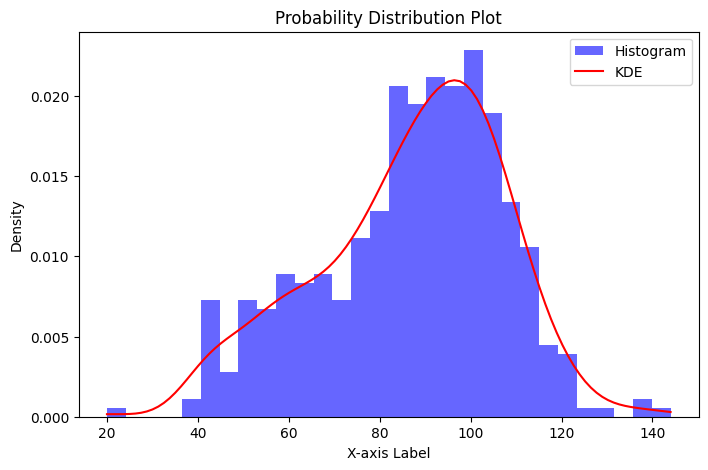

In [23]:

plt.figure(figsize=(8, 5))
plt.hist(data_kid.kid_score, bins=30, density=True, alpha=0.6, color='blue', label='Histogram')
plt.title('Probability Distribution Plot')
plt.xlabel('X-axis Label')
plt.ylabel('Density')
plt.legend()

data = data_kid.kid_score
# Add a kernel density estimate (KDE)
kde = stats.gaussian_kde(data)
x = np.linspace(data.min(), data.max(), 100)
plt.plot(x, kde(x), 'r', label='KDE')
plt.legend()

plt.show()

In [24]:
maes.append(mean_absolute_error(y_test, y_pred))
r2.append(r2_score(y_test, y_pred))

## 2. Polynomial regression
Linear regression with polynomial features

In [25]:
polynomial_regressor = make_pipeline(PolynomialFeatures(), LinearRegression())

poly_param_grid = {
    'polynomialfeatures__degree' : [1, 2, 3, 4]
}

poly_grid_search = GridSearchCV(polynomial_regressor, param_grid=poly_param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

poly_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1, param_grid={'polynomialfeatures__degree': [1, 2, 3, 4]},
             scoring='neg_mean_squared_error')

In [26]:
best_poly_model = poly_grid_search.best_estimator_
model_instances.append(best_poly_model)

In [27]:
y_pred_train = best_poly_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f"Mean Squared Error on the training set: {mse_train}")

Mean Squared Error on the training set: 309.9942074178079


In [28]:
y_pred = best_poly_model.predict(X_test)

In [29]:
mse_2 = mean_squared_error(y_test, y_pred)
models["Polinomial Regression"] = mse
print(f"Mean Squared Error: {mse_2}")

Mean Squared Error: 359.68041721593204


In [30]:
maes.append(mean_absolute_error(y_test, y_pred))
r2.append(r2_score(y_test, y_pred))

## XGBoost

In [31]:
xg_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

xg_model = xgb.XGBRegressor()

xg_grid_search = GridSearchCV(xg_model, param_grid=xg_param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [32]:
xg_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [33]:
best_xgb_model = xg_grid_search.best_estimator_
model_instances.append(best_xgb_model)

y_pred_train = best_xgb_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f"Mean Squared Error on the training set: {mse_train}")

Mean Squared Error on the training set: 207.80229525480308


In [34]:
y_pred = best_poly_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
models["XGBoost"] = mse
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 359.68041721593204


In [35]:
maes.append(mean_absolute_error(y_test, y_pred))
r2.append(r2_score(y_test, y_pred))

## Random Forest

In [36]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]

}

rf_model = RandomForestRegressor()

rf_grid_search = GridSearchCV(rf_model, param_grid=rf_param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [37]:
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [38]:
best_rf_regressor = rf_grid_search.best_estimator_
model_instances.append(best_rf_regressor)

In [39]:
y_pred_train = best_rf_regressor.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f"Mean Squared Error on the training set: {mse_train}")

Mean Squared Error on the training set: 240.36013450966976


In [40]:
y_pred = best_rf_regressor.predict(X_test)

In [41]:
mse = mean_squared_error(y_test, y_pred)
models["Random Forest"] = mse
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 286.1772986341817


In [42]:
maes.append(mean_absolute_error(y_test, y_pred))
r2.append(r2_score(y_test, y_pred))

In [43]:
mlp_param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50)],
    'activation': ['relu'],
    'alpha': [0.01],
    'max_iter': [50000],
}

mlp_grid_search = GridSearchCV(
    MLPRegressor(),
    param_grid=mlp_param_grid,
    cv=5,  
    scoring='neg_mean_squared_error', 
    n_jobs=-1,
)

In [44]:
mlp_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'activation': ['relu'], 'alpha': [0.01],
                         'hidden_layer_sizes': [(100,), (100, 50)],
                         'max_iter': [50000]},
             scoring='neg_mean_squared_error')

In [45]:
best_mlp = mlp_grid_search.best_estimator_
model_instances.append(best_mlp)

In [46]:
y_pred = best_mlp.predict(X_test)

In [47]:
y_pred_train = best_mlp.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f"Mean Squared Error on the training set: {mse_train}")

Mean Squared Error on the training set: 272.8775761280396


In [48]:
mse = mean_squared_error(y_test, y_pred)
models["MLP"] = mse
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 372.9542268474417


In [49]:
maes.append(mean_absolute_error(y_test, y_pred))
r2.append(r2_score(y_test, y_pred))

# Model Evaluation

In [50]:
models

{'Linear Regression': 359.68041721593204,
 'Polinomial Regression': 359.68041721593204,
 'Simple DT': 359.68041721593204,
 'Random Forest': 286.1772986341817,
 'MLP': 372.9542268474417}

In [51]:
mse_sq = {k: v**0.5 for k, v in models.items()}

In [52]:
categories = list(models.keys())

#RMSE
values = mse_sq
fig = px.bar(x=categories, y=values, title='Root Mean Squared Error (RMSE) - Less is better')
fig.show()

#MSE
categories = list(models.keys())
values = list(models.values())
fig = px.bar(x=categories, y=values, title='Mean Squared Error (MSE) - Less is better')
fig.show()

#MAE
categories = list(models.keys())
values = maes
fig = px.bar(x=categories, y=values, title='MAE - Less is better')
fig.show()

#R2
categories = list(models.keys())
values = r2
fig = px.bar(x=categories, y=values, title='R2 - More is better')
fig.show()

We can clearly see that Random Forest es the best altenative for all metrics

# Evaluating the Learning Curves based on a Sklearn Implementation

This is done to undestand if out model is overfitting or underfitting

In [70]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    scoring : str or callable, default=None
        A str (see model evaluation documentation) or
        a scorer callable object / function with signature
        ``scorer(estimator, X, y)``.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [54]:
import sklearn.metrics as met
met.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall

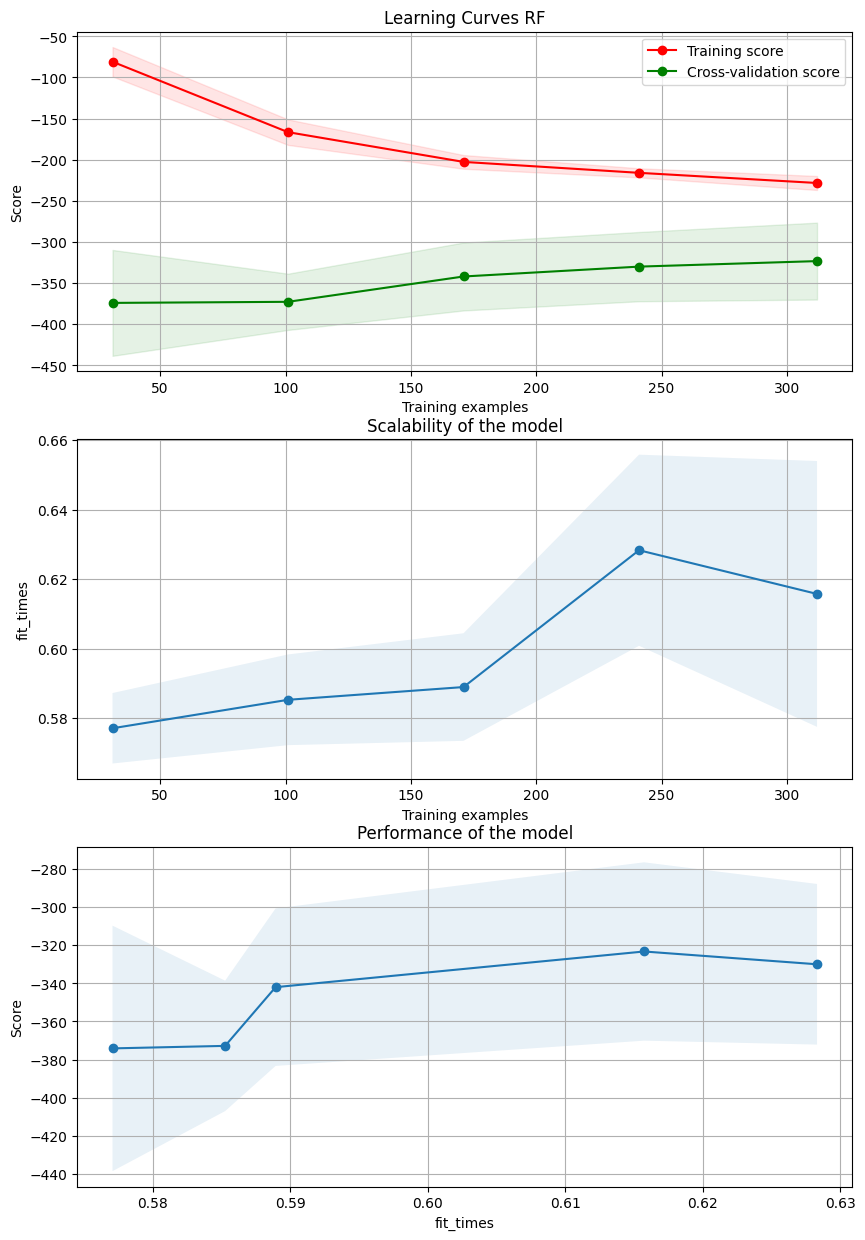

In [72]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

X, y = X_train, y_train

title = "Learning Curves RF"

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

estimator = best_rf_regressor

plot_learning_curve(
    estimator, title, X, y, axes=ax, cv=cv, n_jobs=4,scoring="neg_mean_squared_error"
)

plt.show()